In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# Show first rows
display(df.head())
df.info()

# Standardize column names (lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop less useful columns
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Clean price and service fee
for col in ['price', 'service_fee']:
    df[col] = df[col].astype(str).str.replace('$', '', regex=False)
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Rename columns
df.rename(columns={'price': 'price_$', 'service_fee': 'service_fee_$'}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Fix data types safely
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce').astype('Int64')

# Fix spelling issues in neighbourhood_group
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df.loc[df['neighbourhood_group'] == 'Brookin', 'neighbourhood_group'] = 'Brooklyn'

# Confirm changes
display(df.head())
df.info()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  object        
 1   name                            83390 non-null  object        
 2   host_id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host_name                       83390 non-null  object        
 5   neighbourhood_group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country_code                    83390 non-null  object        
 11  instan

In [26]:
df = df[df['availability_365'] <= 365]


In [27]:
df.describe()


,lat,long,instant_bookable,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,81242.000000,81242.000000,81242.000000,81242.0,81242.000000,81242.000000,81242.000000,81242.000000,81242,81242.000000,81242.000000,81242.000000,81242.000000
mean,40.727256,-73.948263,0.497464,2012.48987,626.625760,125.326211,7.418047,32.010303,2019-06-21 03:51:10.027817984,1.390924,3.286305,7.106792,135.037148
min,40.504560,-74.249840,0.000000,2003.0,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982070,0.000000,2007.0,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721250,-73.953590,0.000000,2012.0,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930480,1.000000,2017.0,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.0,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056391,0.050625,0.499997,5.76077,331.762832,66.355878,28.366255,51.665773,NaN,1.761280,1.278717,29.854202,128.464648


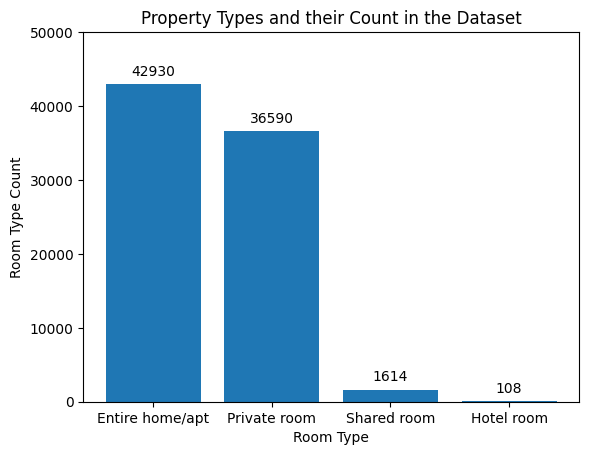

In [29]:
# Get room type counts
property_types = df['room_type'].value_counts().to_frame(name="count")

# Plot bar chart
room_type_bar = plt.bar(property_types.index, property_types["count"])

# Add labels to bars
plt.bar_label(room_type_bar, labels=property_types["count"], padding=4)

# Formatting
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their Count in the Dataset')

plt.show()


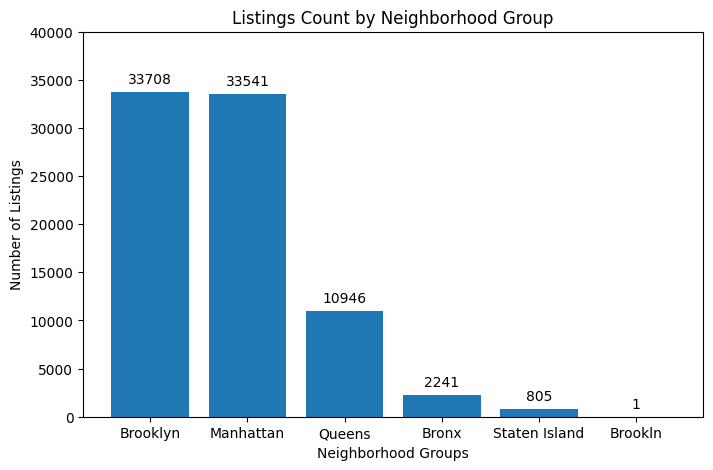

In [32]:
# Get neighbourhood group counts
hood_group = df['neighbourhood_group'].value_counts().to_frame(name="count")

# Plot bar chart
plt.figure(figsize=(8,5))
hood_group_bar = plt.bar(hood_group.index, hood_group["count"])

# Add labels on bars
plt.bar_label(hood_group_bar, labels=hood_group["count"], padding=4)

# Formatting
plt.ylim([0, 40000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.title('Listings Count by Neighborhood Group')

plt.show()


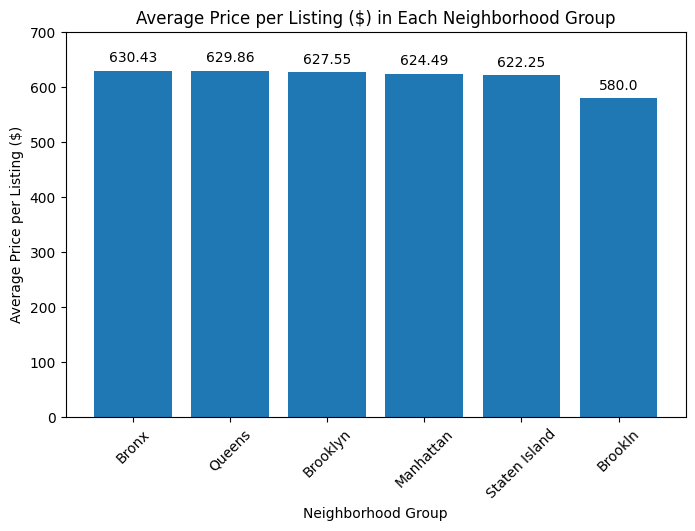

In [34]:
# Calculate average price by neighbourhood group
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])

# Add labels on bars (rounded to 2 decimals)
plt.bar_label(avg_price_bar, labels=avg_price['price_$'].round(2), label_type='edge', padding=4)

# Formatting
plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in Each Neighborhood Group')

plt.show()


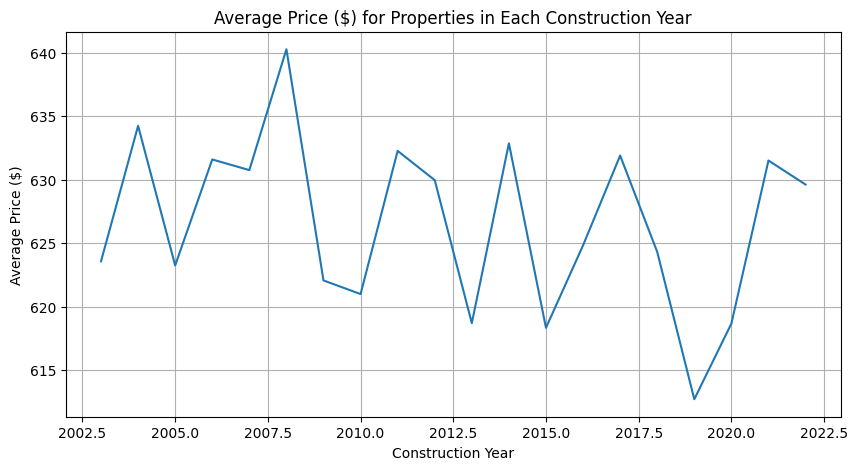

In [35]:
# Group by construction year and calculate average price
avg_price_year = df.groupby('construction_year')['price_$'].mean().to_frame()

# Plot as a line chart
avg_price_year.plot(kind="line", figsize=(10,5), legend=False)

# Formatting
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in Each Construction Year')
plt.grid(True)

plt.show()


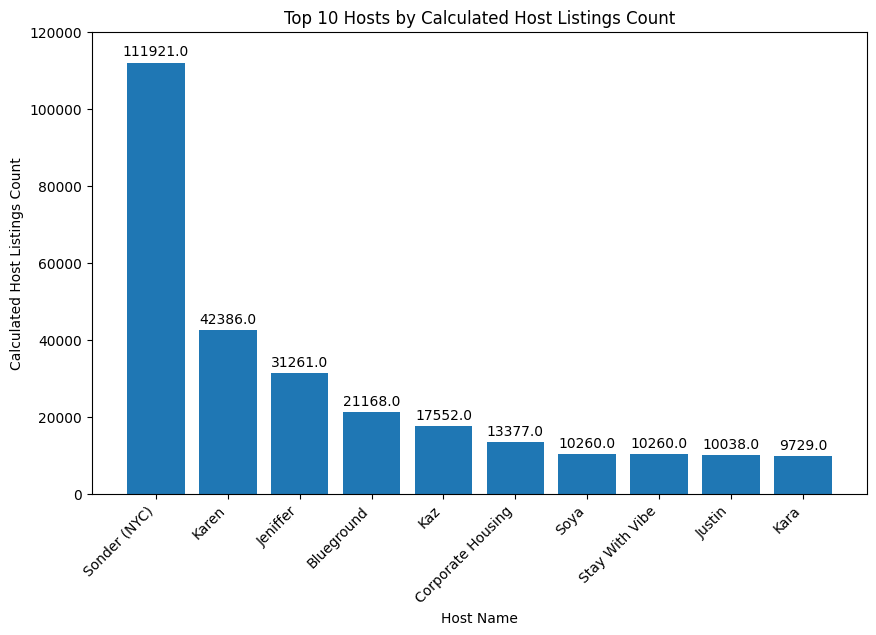

In [36]:
# Top 10 hosts by listing count
hosts = (
    df.groupby('host_name')['calculated_host_listings_count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Plot bar chart
plt.figure(figsize=(10,6))
hosts_bar = plt.bar(hosts.index, hosts['calculated_host_listings_count'])

# Add labels on bars
plt.bar_label(hosts_bar, labels=hosts['calculated_host_listings_count'], label_type='edge', padding=3)

# Formatting
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')

plt.show()


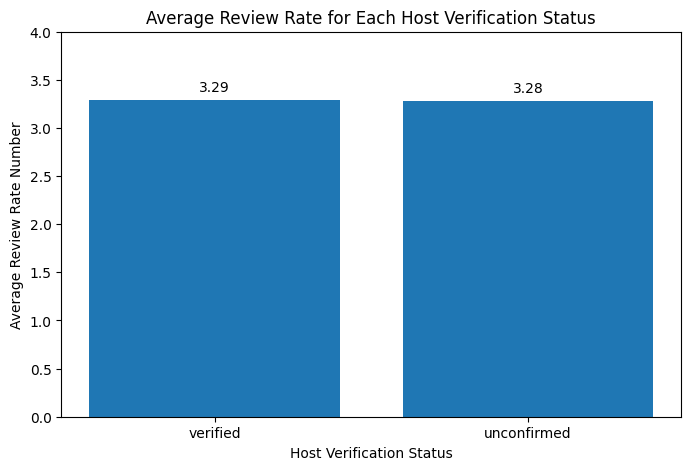

In [37]:
# Group by verification status and calculate average review rate
review = (
    df.groupby('host_identity_verified')['review_rate_number']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

# Plot bar chart
plt.figure(figsize=(8,5))
review_bar = plt.bar(review.index, review['review_rate_number'])

# Add labels on bars (rounded to 2 decimals)
plt.bar_label(review_bar, labels=review['review_rate_number'].round(2), padding=4)

# Formatting
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for Each Host Verification Status')

plt.show()


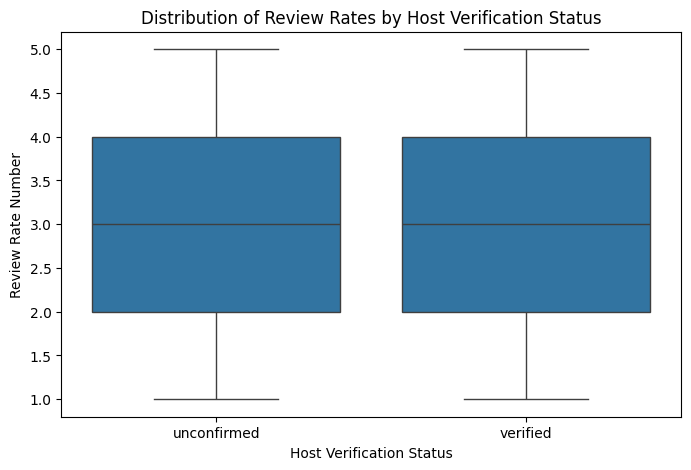

In [38]:
# Base color for plot
base_color = sns.color_palette()[0]

# Boxplot of review rate vs verification status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="host_identity_verified", y="review_rate_number", color=base_color)

# Formatting
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Distribution of Review Rates by Host Verification Status')

plt.show()


Correlation between Price and Service Fee: 0.9999909005366617


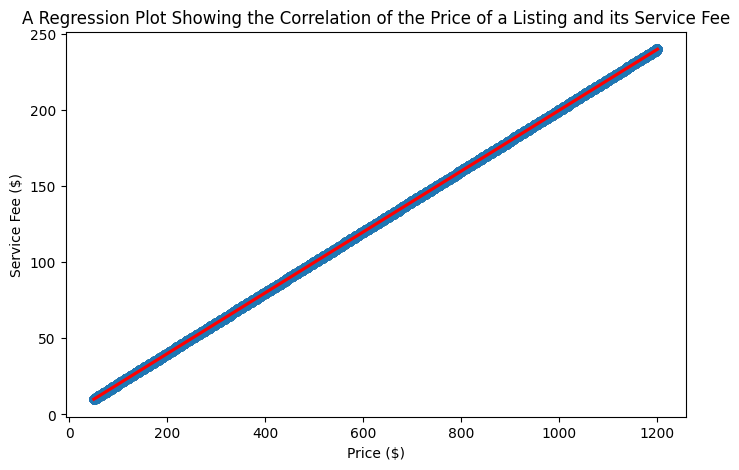

In [44]:
# Correlation between price and service fee
correlation = df['price_$'].corr(df['service_fee_$'])
print("Correlation between Price and Service Fee:", correlation)

# Regression plot showing correlation
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='price_$',
    y='service_fee_$',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot Showing the Correlation of the Price of a Listing and its Service Fee')

plt.show()



In [45]:
# Average Review Rate Number by Neighbourhood Group and Room Type
ARRN = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame(name='avg_review_rate')

# Display the result
display(ARRN)


avg_review_rate
neighbourhood_group room_type                       
Bronx               Entire home/apt         3.378190
                    Private room            3.315789
                    Shared room             3.356322
Brookln             Private room            4.000000
Brooklyn            Entire home/apt         3.251608
                    Hotel room              3.833333
                    Private room            3.283334
                    Shared room             3.327759
Manhattan           Entire home/apt         3.274865
                    Hotel room              3.500000
                    Private room            3.293353
                    Shared room             3.269350
Queens              Entire home/apt         3.358124
                    Hotel room              3.750000
                    Private room            3.317546
                    Shared room             3.326087
Staten Island       Entire home/apt         3.326877
                    Private room            3.490909
                    Shared room             3.714286

/tmp/ipython-input-1913685948.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


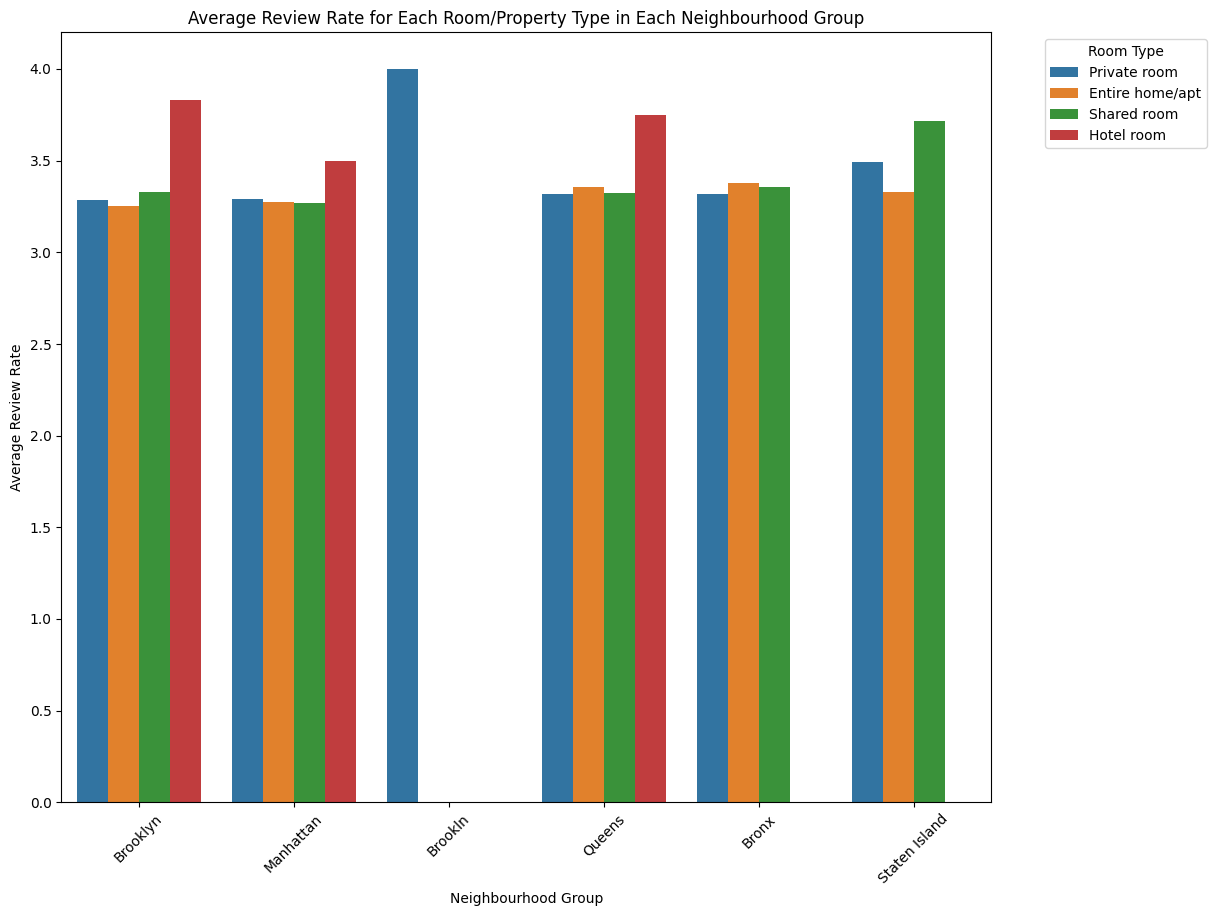

In [46]:
plt.figure(figsize=(12,10))

sns.barplot(
    data=df,
    x='neighbourhood_group',
    y='review_rate_number',
    hue='room_type',
    ci=None  # optional: removes confidence intervals
)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Each Room/Property Type in Each Neighbourhood Group')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()


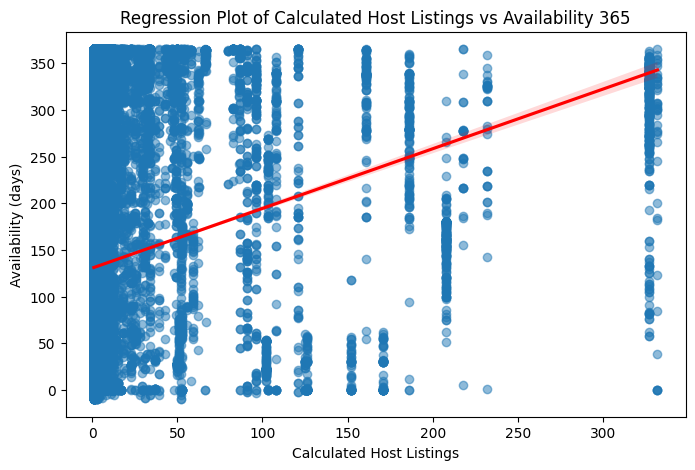

In [47]:
plt.figure(figsize=(8,5))

sns.regplot(
    data=df,
    x='calculated_host_listings_count',
    y='availability_365',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability (days)')
plt.title('Regression Plot of Calculated Host Listings vs Availability 365')

plt.show()


In [48]:
# Correlation between calculated host listings and availability
correlation = df['calculated_host_listings_count'].corr(df['availability_365'])
print("Correlation between Calculated Host Listings and Availability 365:", correlation)


Correlation between Calculated Host Listings and Availability 365: 0.14857327574146945
